In [2]:
import zipfile
import os

# Unzip the file
zip_path = "/content/archive.zip"
extract_path = "/content/archive"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted directory
contents = os.listdir(extract_path)
contents

['Alzheimer_s Dataset']

In [10]:
# Checking the categories/subdirectories in the "Training" directory
training_path = os.path.join(extract_path, "Alzheimer_s Dataset/train")
training_categories = os.listdir(training_path)

# Checking the categories/subdirectories in the "Testing" directory
testing_path = os.path.join(extract_path, "Alzheimer_s Dataset/test")
testing_categories = os.listdir(testing_path)

training_categories, testing_categories

(['NonDemented', 'ModerateDemented', 'VeryMildDemented', 'MildDemented'],
 ['NonDemented', 'ModerateDemented', 'VeryMildDemented', 'MildDemented'])

In [11]:
import cv2
import numpy as np

# Parameters
IMG_SIZE = 128  # Size to resize images
NUM_CLASSES = len(training_categories)  # Number of categories

# Function to load dataset
def load_data(data_path, categories):
    data = []
    labels = []
    for category_id, category in enumerate(categories):
        category_path = os.path.join(data_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load image in grayscale and resize
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(category_id)
            except Exception as e:
                print(f"Error reading file {img_path}: {e}")
    return np.array(data), np.array(labels)

# Loading training and testing datasets
X_train, y_train = load_data(training_path, training_categories)
X_test, y_test = load_data(testing_path, testing_categories)

# Reshaping data to fit the model and normalizing
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype('float32') / 255.0

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5121, 128, 128, 1), (5121,), (1279, 128, 128, 1), (1279,))

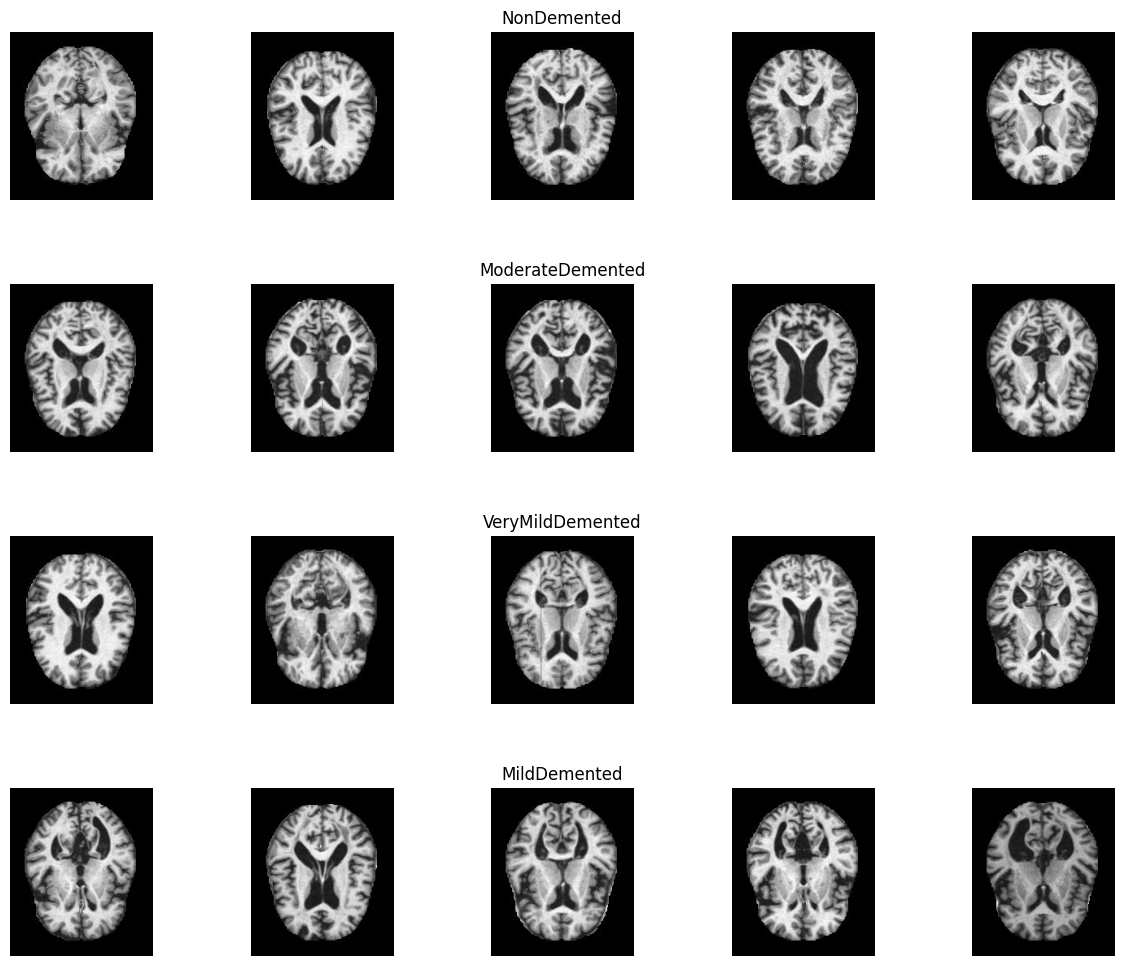

In [12]:
import matplotlib.pyplot as plt

# Visualizing sample images from each category in the training dataset

fig, axes = plt.subplots(len(training_categories), 5, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for idx, category in enumerate(training_categories):
    sample_images = [img for img in os.listdir(os.path.join(training_path, category))][:5]
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(training_path, category, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[idx, j].imshow(img, cmap='gray')
        axes[idx, j].axis('off')
        if j == 2:
            axes[idx, j].set_title(category)

plt.show()

In [26]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# CNN Model Architecture
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# (Optional) Save the model
model.save("Alzheimer_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.5777 - loss: 0.9022 - val_accuracy: 0.0000e+00 - val_loss: 3.0017
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6212 - loss: 0.7040 - val_accuracy: 0.0498 - val_loss: 4.4954
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6824 - loss: 0.6428 - val_accuracy: 0.1405 - val_loss: 4.2801
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7014 - loss: 0.5972 - val_accuracy: 0.1551 - val_loss: 6.1686
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7256 - loss: 0.5539 - val_accuracy: 0.1844 - val_loss: 8.1005
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7651 - loss: 0.5077 - val_accuracy: 0.2029 - val_loss: 8.2351
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.8025 - loss: 0.4375 - val_accuracy: 0.2341 - val_loss: 8.9721
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8120 - loss: 0.4183 - val_

Test Loss: 3.59403395652771
Test Accuracy: 0.5535574555397034


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,820,878 (148.09 MB)

 Trainable params: 12,940,292 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,880,586 (98.73 MB)

In [28]:
# Visualization and Graph Generation Code

def plot_training_history(history):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, categories):
    """Function to plot the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Return the function definitions
plot_training_history, plot_confusion_matrix

(<function __main__.plot_training_history(history)>,
 <function __main__.plot_confusion_matrix(y_true, y_pred, categories)>)

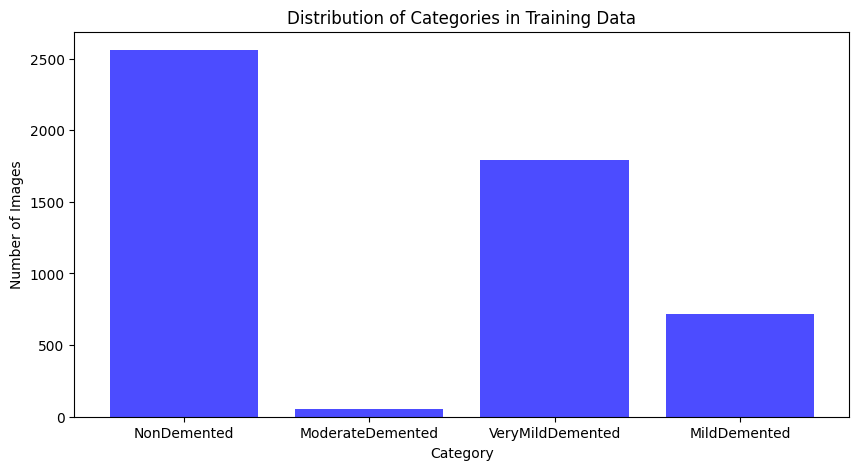

In [29]:
# Histogram of Training Labels
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=np.arange(len(training_categories) + 1) - 0.5, alpha=0.7, rwidth=0.8, align='mid', color='blue')
plt.xticks(ticks=np.arange(len(training_categories)), labels=training_categories)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Categories in Training Data')
plt.show()

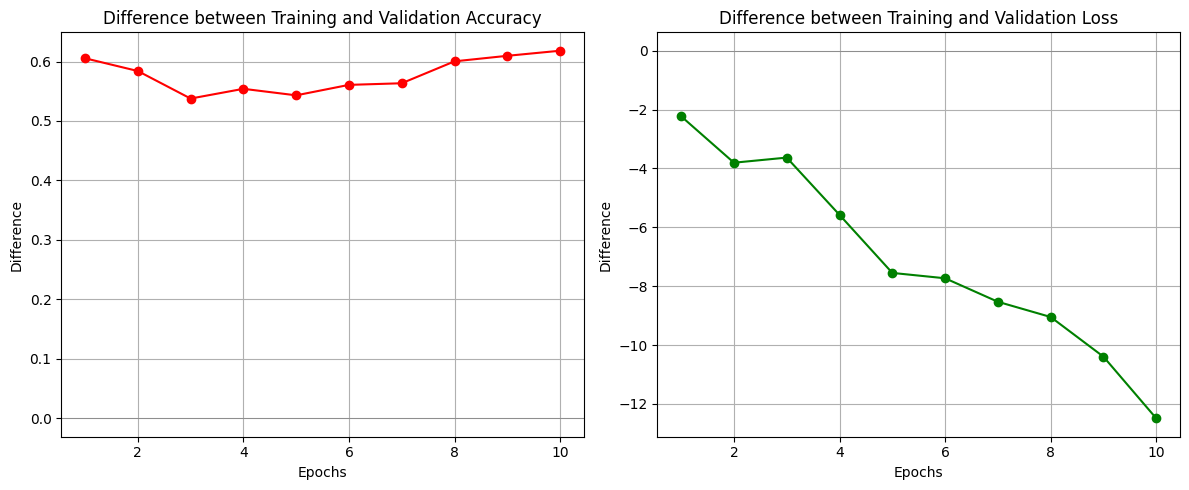

In [30]:
import matplotlib.pyplot as plt

# Retrieve data from history
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Compute differences
train_val_acc_difference = [train - val for train, val in zip(training_accuracy, validation_accuracy)]
train_val_loss_difference = [train - val for train, val in zip(training_loss, validation_loss)]

# Plotting
plt.figure(figsize=(12, 5))

# Difference between Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_val_acc_difference, marker='o', color='red', linestyle='-')
plt.axhline(0, color='gray', linewidth=0.5)
plt.xlabel('Epochs')
plt.ylabel('Difference')
plt.title('Difference between Training and Validation Accuracy')
plt.grid(True)

# Difference between Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_val_loss_difference, marker='o', color='green', linestyle='-')
plt.axhline(0, color='gray', linewidth=0.5)
plt.xlabel('Epochs')
plt.ylabel('Difference')
plt.title('Difference between Training and Validation Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

Model loaded successfully.
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step
Confusion Matrix:
 [[306   0 334   0]
 [  2   2   8   0]
 [ 48   0 400   0]
 [ 61   0 118   0]]


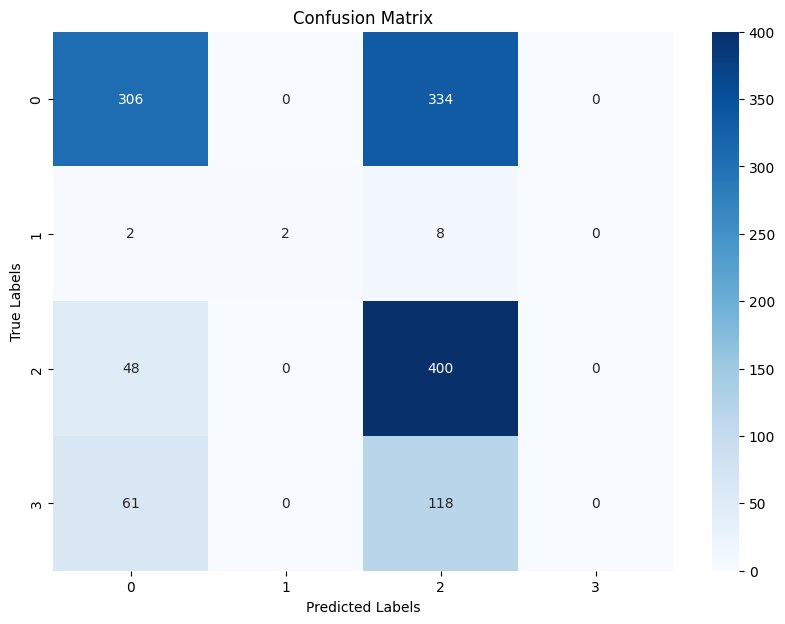


Classification Report:
                   precision    recall  f1-score   support

     NonDemented       0.73      0.48      0.58       640
ModerateDemented       1.00      0.17      0.29        12
VeryMildDemented       0.47      0.89      0.61       448
    MildDemented       0.00      0.00      0.00       179

        accuracy                           0.55      1279
       macro avg       0.55      0.38      0.37      1279
    weighted avg       0.54      0.55      0.51      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Path to the saved model
model_path = "/content/Alzheimer_cnn_model.h5"

# Check if the model file exists
if os.path.exists(model_path):
    # Load the trained model
    model = load_model(model_path)
    print("Model loaded successfully.")

    # Generate predictions on the test set
    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    print("Confusion Matrix:\n", conf_matrix)

    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Optional: print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=testing_categories))

else:
    print("Model file not found! Please check the file path.")

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.48      0.58       640
           1       1.00      0.17      0.29        12
           2       0.47      0.89      0.61       448
           3       0.00      0.00      0.00       179

    accuracy                           0.55      1279
   macro avg       0.55      0.38      0.37      1279
weighted avg       0.54      0.55      0.51      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
